# Figures 1 and 2 (Molina et al., in prep.)

## Imports

In [1]:
import warnings
from itertools import product
import glob
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import xarray as xr

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.path as mpath
import cartopy
import cartopy.crs as ccrs
import cartopy.feature
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import cartopy.feature as cf
import shapely.geometry as sgeom

from sklearn.decomposition import PCA
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import xskillscore as xs

import som_analysis
import cluster_analysis
import narm_analysis

In [2]:
mpl.rcParams['hatch.linewidth'] = 0.3

## functions

In [3]:
def get_cold_indx(ds, mo_init=9, mo_end=2):
    """
    Extract indices for cold season.
    Grabbing Sept thru February init, for Oct thru March predictions.
    """
    dt_array = pd.to_datetime(ds['time'])
    return xr.where((dt_array.month>=mo_init) | (dt_array.month<=mo_end), True, False)

## open data

In [4]:
ds_era5 = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/era5_wxregimes.nc')
ds_cesm = xr.open_dataset('/glade/scratch/molina/s2s/bootstrap/cesm_wxregimes.nc')

## figure (era5 weather regimes)

/glade/scratch/molina/ipykernel_263071/69885126.py:135: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


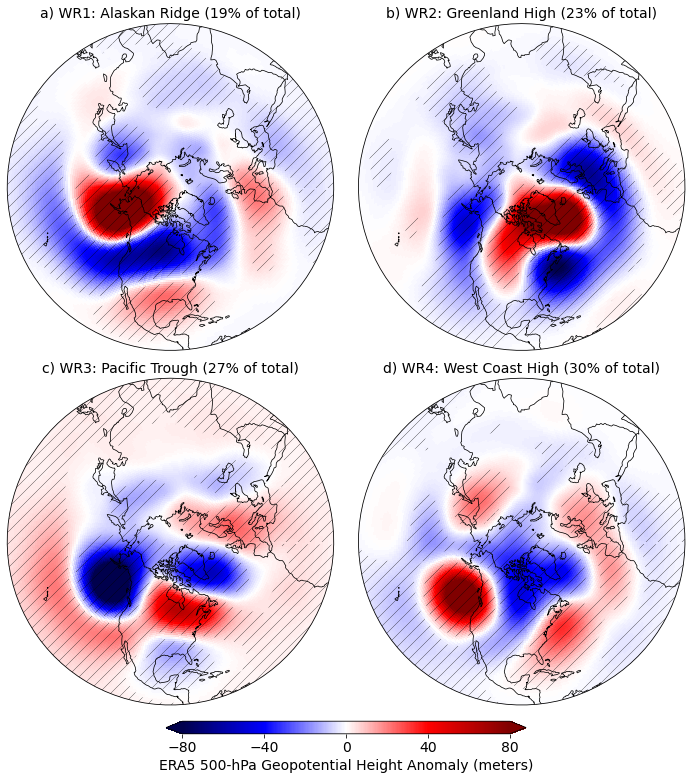

In [6]:
total = ds_era5['wr_nums'].sum().values
lons, lats = np.meshgrid(ds_era5['wr1_era5'].lon, ds_era5['wr1_era5'].lat)

# ---

fig, axs = plt.subplots(2, 2, 
                        subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-90)), 
                        figsize=(10,10))

# ---

axs[0][0].pcolormesh(lons, lats, ds_era5['wr1_era5'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][0].contourf(lons, lats, np.where((
    ds_era5['wr1_era5'].values<=ds_era5['wr1_era5_005'].values)|(
    ds_era5['wr1_era5'].values>=ds_era5['wr1_era5_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][0].set_title(
    f'a) WR1: Alaskan Ridge ({int(np.around((ds_era5["wr_nums"].isel(wr=0).values / total) * 100))}% of total)', 
    fontsize=14)

axs[0][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][0].margins(x=0,y=0)

axs[0][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][0].set_boundary(circle, transform=axs[0][0].transAxes)

# ---

axs[0][1].pcolormesh(lons, lats, ds_era5['wr2_era5'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][1].contourf(lons, lats, np.where((
    ds_era5['wr2_era5'].values<=ds_era5['wr2_era5_005'].values)|(
    ds_era5['wr2_era5'].values>=ds_era5['wr2_era5_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)
        
axs[0][1].set_title(
    f'b) WR2: Greenland High ({int(np.around((ds_era5["wr_nums"].isel(wr=1).values / total) * 100))}% of total)', 
    fontsize=14)

axs[0][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][1].margins(x=0,y=0)

axs[0][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][1].set_boundary(circle, transform=axs[0][1].transAxes)

# ---

axs[1][0].pcolormesh(lons, lats, ds_era5['wr3_era5'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][0].contourf(lons, lats, np.where((
    ds_era5['wr3_era5'].values<=ds_era5['wr3_era5_005'].values)|(
    ds_era5['wr3_era5'].values>=ds_era5['wr3_era5_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][0].set_title(
    f'c) WR3: Pacific Trough ({int(np.around((ds_era5["wr_nums"].isel(wr=2).values / total) * 100))}% of total)', 
    fontsize=14)

axs[1][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][0].margins(x=0,y=0)

axs[1][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][0].set_boundary(circle, transform=axs[1][0].transAxes)

# ---

pm = axs[1][1].pcolormesh(lons, lats, ds_era5['wr4_era5'].values, 
                          transform=ccrs.PlateCarree(), 
                          vmin=-80, vmax=80, cmap='seismic')

axs[1][1].contourf(lons, lats, np.where((
    ds_era5['wr4_era5'].values<=ds_era5['wr4_era5_005'].values)|(
    ds_era5['wr4_era5'].values>=ds_era5['wr4_era5_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][1].set_title(
    f'd) WR4: West Coast High ({int(np.around((ds_era5["wr_nums"].isel(wr=3).values / total) * 100))}% of total)', 
    fontsize=14)

axs[1][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][1].margins(x=0,y=0)

axs[1][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][1].set_boundary(circle, transform=axs[1][1].transAxes)

# ---

cbar_ax = fig.add_axes([0.25, -0.025, 0.5, 0.0175])

ticks_1 = [-80,-40,0,40,80]
cbar = fig.colorbar(pm, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')

cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'ERA5 500-hPa Geopotential Height Anomaly (meters)', fontsize=14)

# ---

plt.tight_layout()
plt.savefig(f"fig1_wr_era5.png", bbox_inches='tight', dpi=500)
plt.show()

# ---

/glade/scratch/molina/ipykernel_263071/1190446820.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


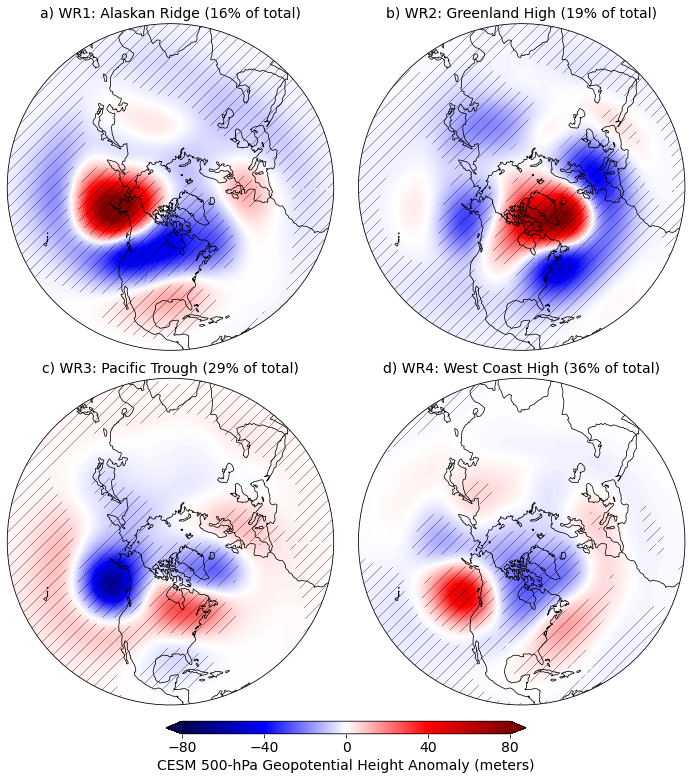

In [7]:
total = ds_cesm['wr_nums'].sum().values
lons, lats = np.meshgrid(ds_cesm['wr1_cesm'].lon, ds_cesm['wr1_cesm'].lat)

# ---

fig, axs = plt.subplots(2, 2, 
                        subplot_kw=dict(projection=ccrs.NorthPolarStereo(central_longitude=-90.0)), 
                        figsize=(10,10))

# ---

axs[0][0].pcolormesh(lons, lats, ds_cesm['wr1_cesm'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][0].contourf(lons, lats, np.where((
    ds_cesm['wr1_cesm'].values<=ds_cesm['wr1_cesm_005'].values)|(
    ds_cesm['wr1_cesm'].values>=ds_cesm['wr1_cesm_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[0][0].set_title(
    f'a) WR1: Alaskan Ridge ({int(np.around((ds_cesm["wr_nums"].isel(wr=0).values / total) * 100))}% of total)', 
    fontsize=14)

axs[0][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][0].margins(x=0,y=0)

axs[0][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][0].set_boundary(circle, transform=axs[0][0].transAxes)

# ---

axs[0][1].pcolormesh(lons, lats, ds_cesm['wr2_cesm'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[0][1].contourf(lons, lats, np.where((
    ds_cesm['wr2_cesm'].values<=ds_cesm['wr2_cesm_005'].values)|(
    ds_cesm['wr2_cesm'].values>=ds_cesm['wr2_cesm_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)
        
axs[0][1].set_title(
    f'b) WR2: Greenland High ({int(np.around((ds_cesm["wr_nums"].isel(wr=1).values / total) * 100))}% of total)', 
    fontsize=14)
axs[0][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[0][1].margins(x=0,y=0)

axs[0][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[0][1].set_boundary(circle, transform=axs[0][1].transAxes)

# ---

axs[1][0].pcolormesh(lons, lats, ds_cesm['wr3_cesm'].values, 
                     transform=ccrs.PlateCarree(), 
                     vmin=-80, vmax=80, cmap='seismic')

axs[1][0].contourf(lons, lats, np.where((
    ds_cesm['wr3_cesm'].values<=ds_cesm['wr3_cesm_005'].values)|(
    ds_cesm['wr3_cesm'].values>=ds_cesm['wr3_cesm_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][0].set_title(
    f'c) WR3: Pacific Trough ({int(np.around((ds_cesm["wr_nums"].isel(wr=2).values / total) * 100))}% of total)', 
    fontsize=14)
axs[1][0].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][0].margins(x=0,y=0)

axs[1][0].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][0].set_boundary(circle, transform=axs[1][0].transAxes)

# ---

pm = axs[1][1].pcolormesh(lons, lats, ds_cesm['wr4_cesm'].values, 
                          transform=ccrs.PlateCarree(), 
                          vmin=-80, vmax=80, cmap='seismic')

axs[1][1].contourf(lons, lats, np.where((
    ds_cesm['wr4_cesm'].values<=ds_cesm['wr4_cesm_005'].values)|(
    ds_cesm['wr4_cesm'].values>=ds_cesm['wr4_cesm_995'].values), 
         1., np.nan),
                   transform=ccrs.PlateCarree(), colors='none',
                   hatches=['//'], zorder=100)

axs[1][1].set_title(
    f'd) WR4: West Coast High ({int(np.around((ds_cesm["wr_nums"].isel(wr=3).values / total) * 100))}% of total)', 
    fontsize=14)
axs[1][1].coastlines(resolution='110m', color='k', linewidth=0.75, zorder=10)
axs[1][1].margins(x=0,y=0)

axs[1][1].set_extent([-179, 179, 10, 90], crs=ccrs.PlateCarree())

theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
axs[1][1].set_boundary(circle, transform=axs[1][1].transAxes)

# ---

cbar_ax = fig.add_axes([0.25, -0.025, 0.5, 0.0175])

ticks_1 = [-80,-40,0,40,80]
cbar = fig.colorbar(pm, cax=cbar_ax, ticks=ticks_1[:], 
                    orientation='horizontal', extend='both')

cbar.ax.tick_params(labelsize=14)
cbar.set_label(r'CESM 500-hPa Geopotential Height Anomaly (meters)', fontsize=14)

# ---

plt.tight_layout()
plt.savefig(f"fig1_wr_cesm.png", bbox_inches='tight', dpi=500)
plt.show()

# ---